In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

C:\Users\pro\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_directory = tf.keras.utils.image_dataset_from_directory(
    "D:/dr/newImg/train",
)
valid_directory = tf.keras.utils.image_dataset_from_directory(
    "D:/dr/newImg/test",
)

Found 3648 files belonging to 5 classes.
Found 3272 files belonging to 5 classes.


In [4]:
num_mild_tr = len(os.listdir( "D:/dr/newImg/train"))
num_moderate_tr = len(os.listdir( "D:/dr/newImg/train"))
num_noDR_tr = len(os.listdir( "D:/dr/newImg/train"))
num_proliferativeDR_tr = len(os.listdir( "D:/dr/newImg/train"))
num_severe_tr = len(os.listdir( "D:/dr/newImg/train"))

num_mild_val = len(os.listdir( "D:/dr/newImg/test"))
num_moderate_val = len(os.listdir( "D:/dr/newImg/test"))
num_noDR_val = len(os.listdir( "D:/dr/newImg/test"))
num_proliferativeDR_val = len(os.listdir( "D:/dr/newImg/test"))
num_severe_val = len(os.listdir( "D:/dr/newImg/test"))


total_train = num_mild_tr + num_moderate_tr + num_noDR_tr + num_proliferativeDR_tr + num_severe_tr
total_val = num_mild_val + num_moderate_val + num_noDR_val + num_proliferativeDR_val + num_severe_val

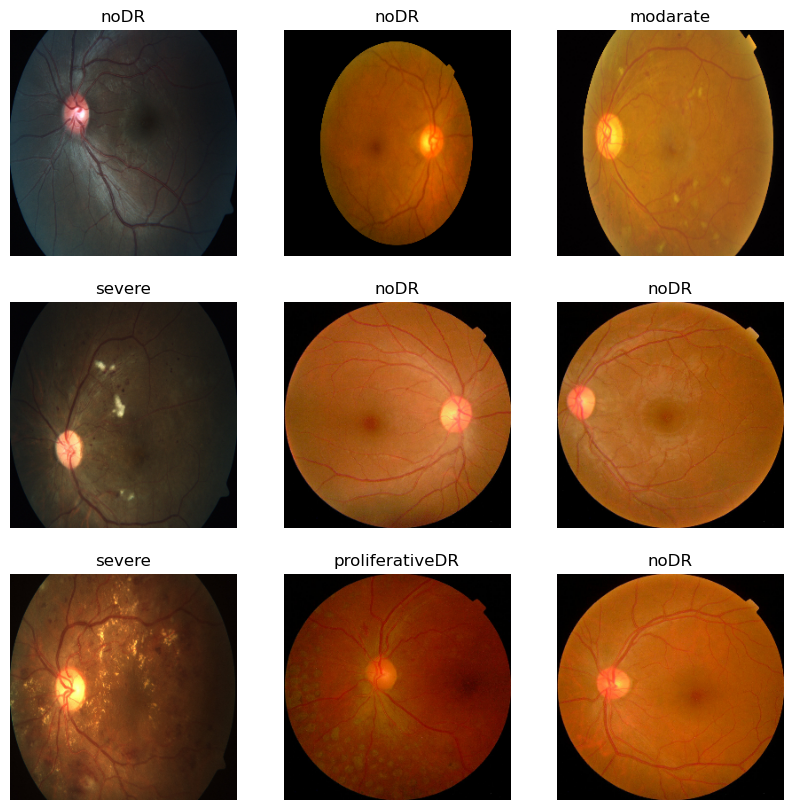

In [5]:
class_names = ["mild", "modarate", "noDR", "proliferativeDR", "severe"]
plt.figure(figsize=(10,10))
for images, labels in train_directory.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [7]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [8]:
#Flipping the image horizontally
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory="D:/dr/newImg/train",
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 3648 images belonging to 5 classes.


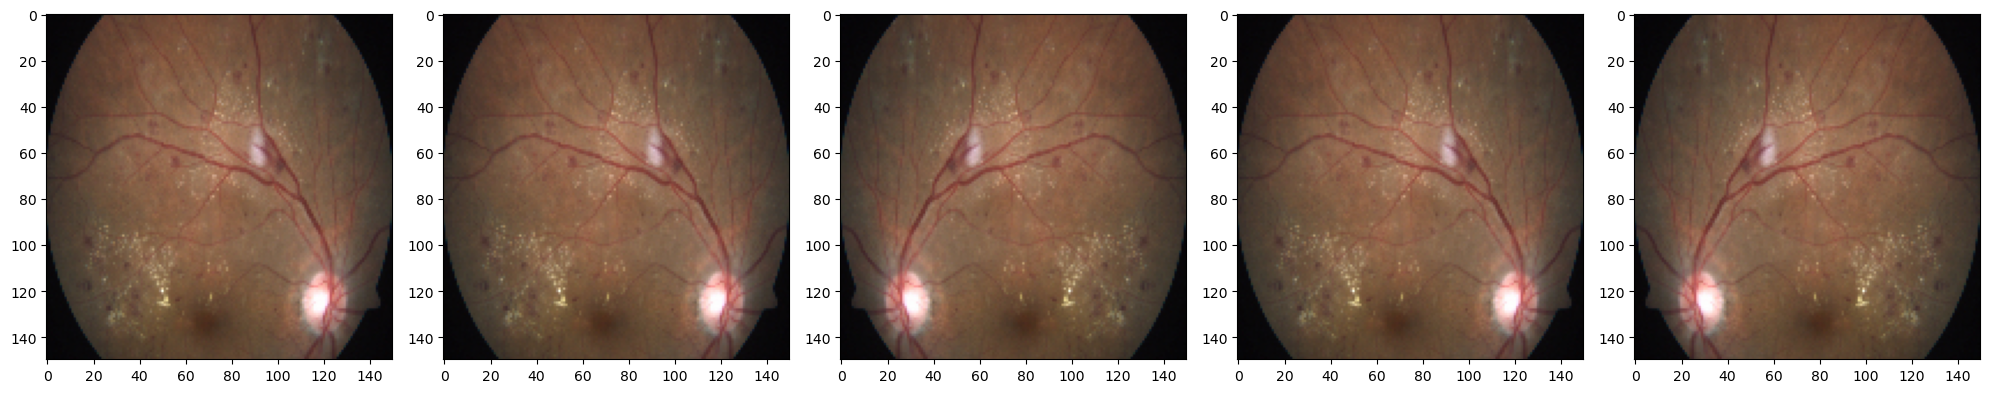

In [9]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [10]:
#Rotating the image

image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory="D:/dr/newImg/train",
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 3648 images belonging to 5 classes.


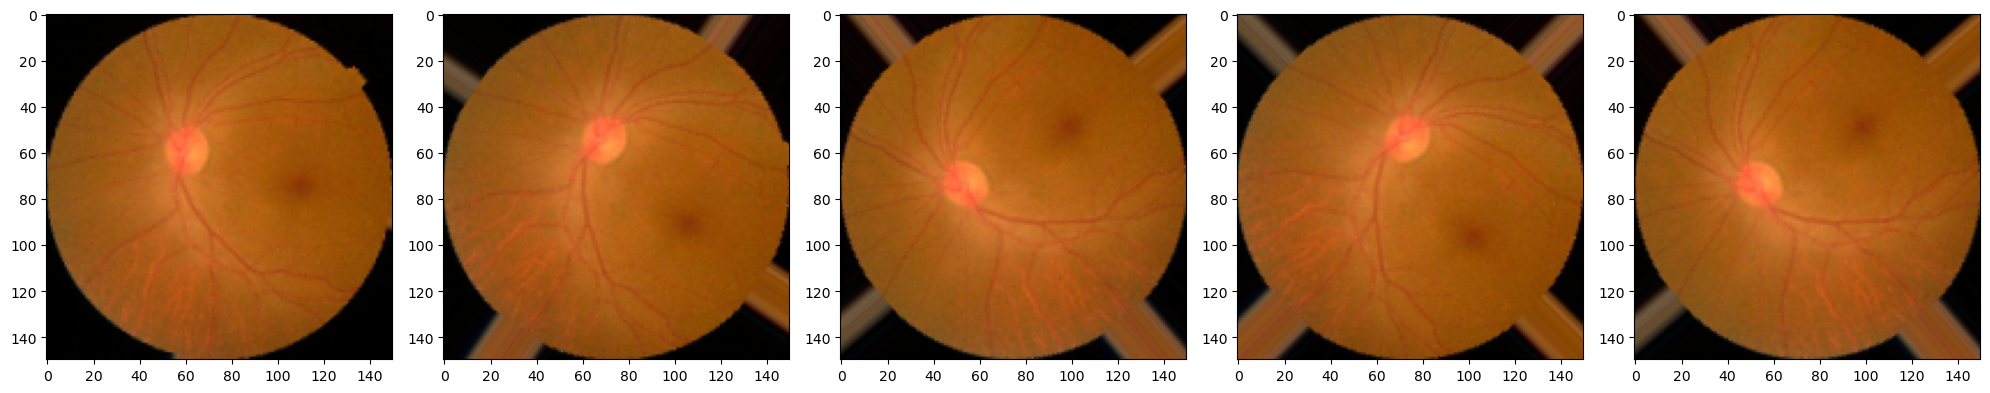

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [12]:
#Applying Zoom
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory= "D:/dr/newImg/train",
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 3648 images belonging to 5 classes.


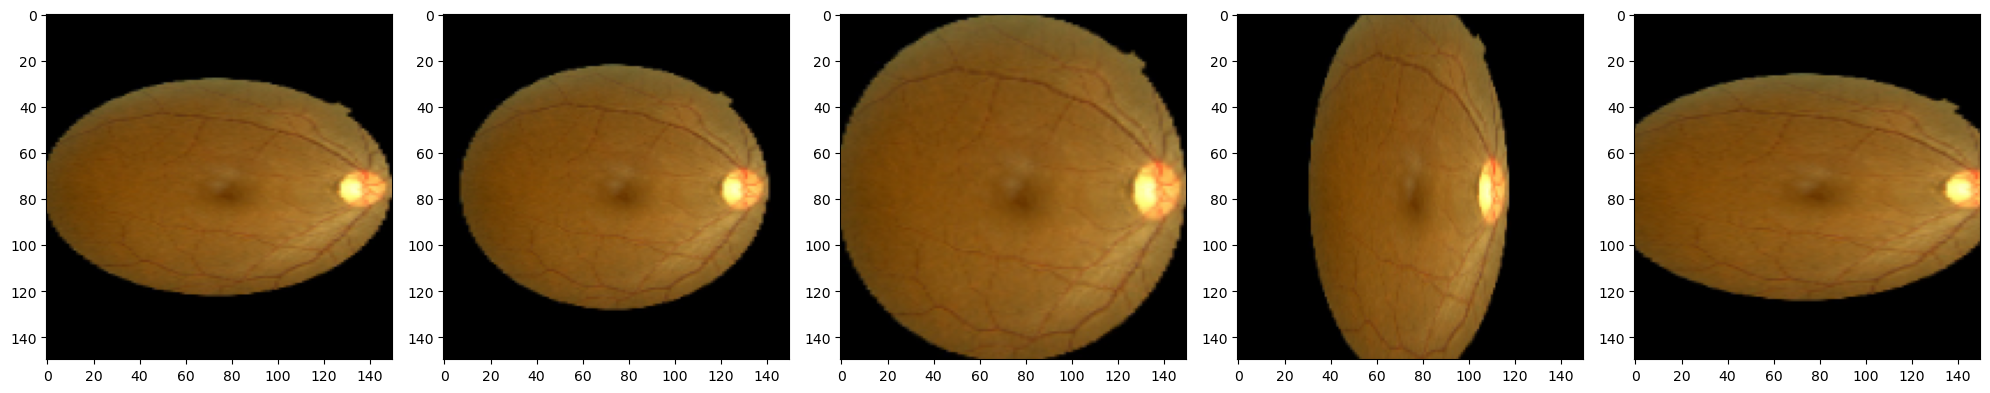

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [14]:
#Putting it all together
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory= "D:/dr/newImg/train",
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 3648 images belonging to 5 classes.


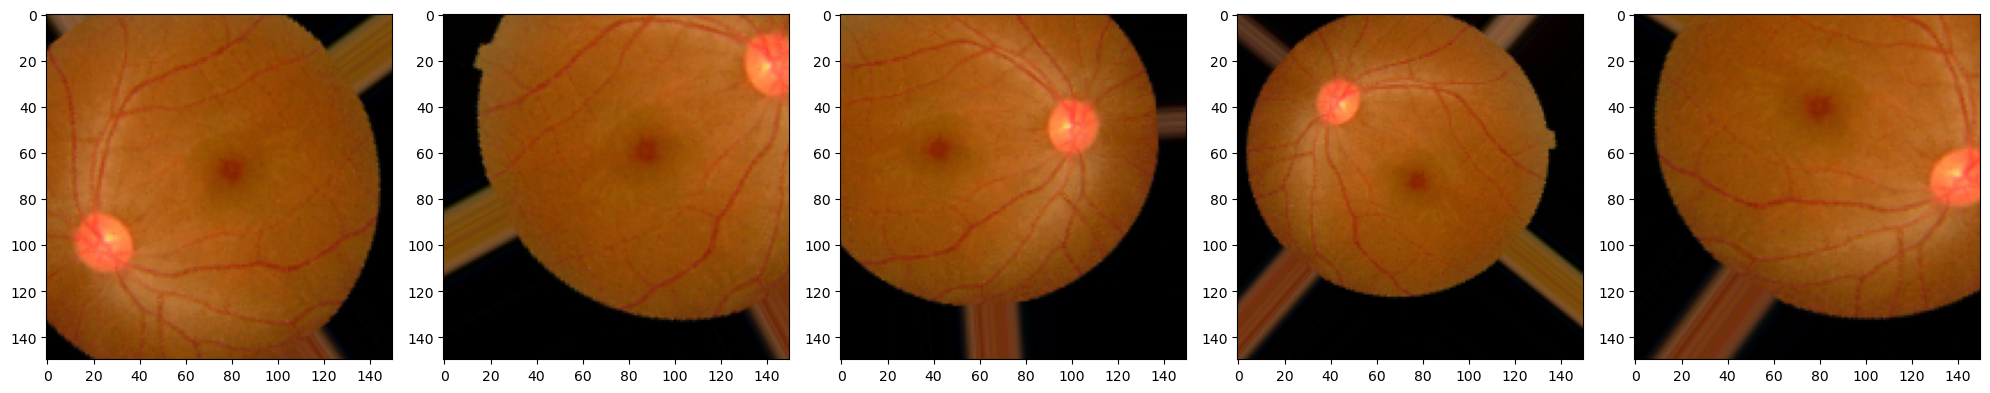

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [16]:
#Creating Validation Data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory="D:/dr/newImg/test",
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 3272 images belonging to 5 classes.


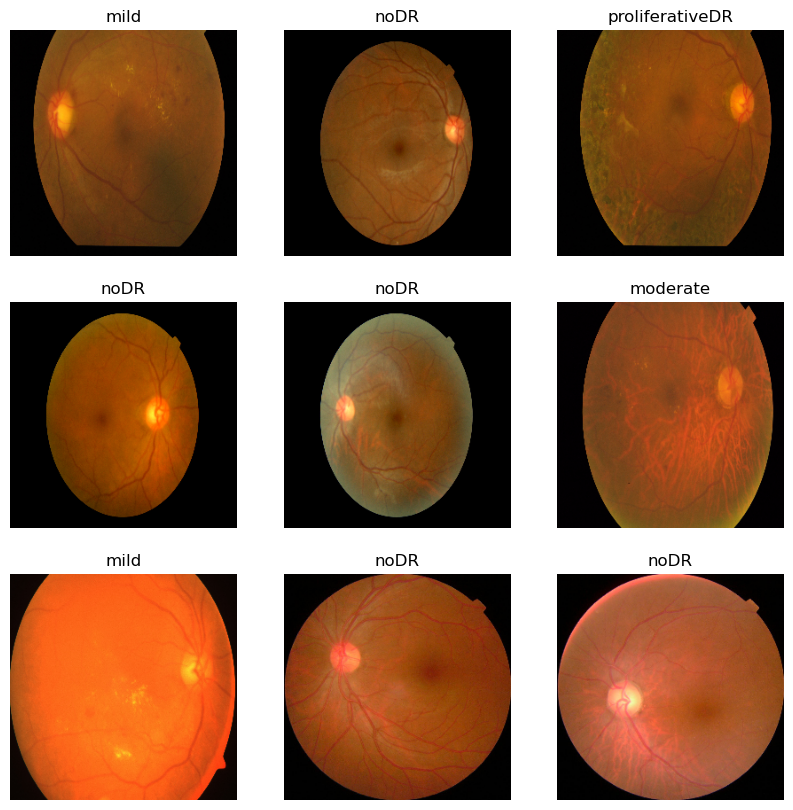

In [17]:
class_names = ["mild", "moderate", "noDR", "proliferativeDR", "severe"]
plt.figure(figsize=(10,10))
for images, labels in train_directory.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [21]:
#Model Creation

In [18]:
#Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3)
])

In [19]:
IMAGE_SIZE =[150, 150]

In [20]:
#Set Vgg16 model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [21]:
from glob import glob

# useful for getting number of classes
folders = glob('D:/dr/newImg/train/*')
len(folders)

5

In [22]:
from keras.layers import Input, Lambda, Dense, Flatten

# our layers
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [29]:
#vgg16Model Summary
from keras.models import Model

# create a model object
vggModel = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
vggModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [30]:
#Compiling the model
vggModel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
#Train the model using vgg16
vggHistory = vggModel.fit_generator(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=10,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(val_data_gen)
)

C:\Users\pro\AppData\Local\Temp\ipykernel_18524\1502212849.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vggHistory = vggModel.fit_generator(


Epoch 1/10



C:\Users\pro\anaconda3\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



37/37 [==============================] - 1015s 28s/step - loss: 1.0235 - accuracy: 0.6255 - val_loss: 0.9293 - val_accuracy: 0.6583
Epoch 2/10
37/37 [==============================] - 919s 25s/step - loss: 0.9057 - accuracy: 0.6760 - val_loss: 0.9363 - val_accuracy: 0.6550
Epoch 3/10
37/37 [==============================] - 910s 25s/step - loss: 0.8743 - accuracy: 0.6839 - val_loss: 0.8825 - val_accuracy: 0.6721
Epoch 4/10
37/37 [==============================] - 1254s 34s/step - loss: 0.8511 - accuracy: 0.6826 - val_loss: 1.0431 - val_accuracy: 0.5639
Epoch 5/10
37/37 [==============================] - 1001s 27s/step - loss: 0.8399 - accuracy: 0.6902 - val_loss: 0.8774 - val_accuracy: 0.6852
Epoch 6/10
37/37 [==============================] - 1239s 34s/step - loss: 0.8124 - accuracy: 0.6894 - val_loss: 0.9395 - val_accuracy: 0.6611
Epoch 7/10
37/37 [==============================] - 1044s 29s/step - loss: 0.8028 - accuracy: 0.7061 - val_loss: 1.0313 - val_accuracy: 0.5923
Epoch 8/10


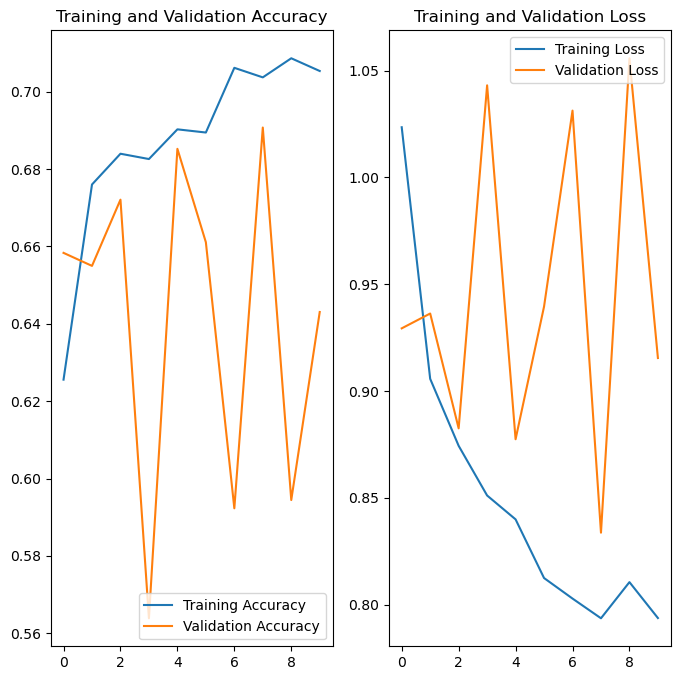

In [32]:
#Visualizing results of the training Vgg16
acc = vggHistory.history['accuracy']
val_acc = vggHistory.history['val_accuracy']

loss = vggHistory.history['loss']
val_loss = vggHistory.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
#Visualizing barplots and confusion metrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [35]:
labels = ["mild", "moderate", "noDR", "proliferativeDR", "severe"]


# Check point
# Showing labels
print(labels)

['mild', 'moderate', 'noDR', 'proliferativeDR', 'severe']


In [37]:
vggModel.save('vggModel.h5')

C:\Users\pro\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
